# Jordan David Nalpon
# GA - DSI 19 Capstone Project
# EMOR (Emotion Recognition)
# Notebook 2 - Pre-Processing / Modeling
# <font color = red> Positive Images </a>
---

## Index

### [Notebook Set Up](#setup)
- [Import Libraries](#su_lib)
- [Import Images](#su_img)

### [Modelling](#model)
- [Training](#train)
- [Model Observation](#model_obs)

### [Export](#export)

---

# <font color =red> This Notebook Uses Positive in the Dataset<br> All Notebook2 uses the same codes except for different set of materials. </a>

## Notebook Set Up <a name = "setup"></a>

### Importing of Libraries <a name = 'su_lib'></a>

In [1]:
import os
import pickle

from fastai.vision import *
from fastai.metrics import error_rate

### Importing of Images <a name = 'su_img'></a>

In [2]:
path_data = '../05_external_folder/positive_images/' #set path to positive images

ImageDataBunch is from the fastai library which imports images from the train and validation folders. This will be used for the modeling process.

In [3]:
data = ImageDataBunch.from_folder(path_data, train="train", valid="validation",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data1 = ImageDataBunch.from_folder(path_data, train="train", valid="validation",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [28]:
data2 = ImageDataBunch.from_folder(path_data, train="train", valid="validation",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.valid_ds #checking of images

LabelList (4991 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sad,sad,neutral,neutral,happy
Path: ..\05_external_folder\positive_images

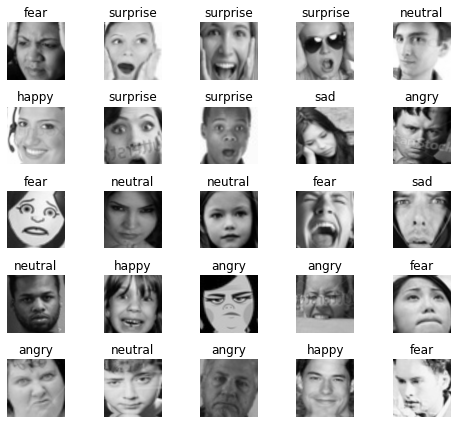

In [5]:
data.show_batch(rows = 5, figsize = (7,6) ) # view sample of the images

---
## Modelling <a name = "model"></a>
This section will create a model of the positive images.

### Training <a name = 'train'></a>

Convolutional Neural Network (CNN) is one of the most popular choices for machine learning of images due to its ability to detect patterns in images. The fastai also has a CNN model function which will be used to train our model.

In [6]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate) #load the model

The model will be train with 4 epochs first to find what is the ideal learning rate which will be used to train the actual model.

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.820616,1.497449,0.548187,02:15
1,1.450791,1.304247,0.485674,02:11
2,1.311823,1.195680,0.450210,02:12
3,1.221946,1.172522,0.440192,02:12


In [8]:
learn.save('stage-1') #saving the 4 epoch model

In [9]:
learn.load('stage-1') #loading the model

Learner(data=ImageDataBunch;

Train: LabelList (19964 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: ..\05_external_folder\positive_images;

Valid: LabelList (4991 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sad,sad,neutral,neutral,happy
Path: ..\05_external_folder\positive_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

In [10]:
learn.lr_find() # find the learning rate of the model

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Below is the learning rate graph of the 4 epoch model.

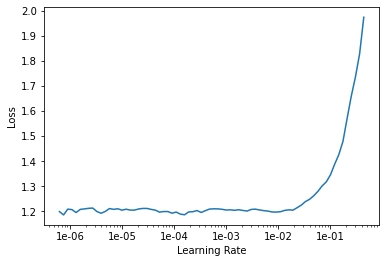

In [11]:
learn.recorder.plot() # 

We can see that the learning rate is optimal at aroudn 1e-4 to 5e-3. The actual model will be trained with this parameter with 8 epoch.

In [12]:
learn.fit_one_cycle(8, max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.233840,1.175986,0.449810,02:12
1,1.262713,1.162921,0.434783,02:13
2,1.188803,1.090593,0.402925,02:13
3,1.123932,1.042674,0.388099,02:14
4,1.066572,1.017576,0.381086,02:20
5,1.023778,0.988522,0.372871,02:36
6,0.970002,0.976970,0.366660,02:52
7,0.958676,0.973810,0.364656,02:46


### Model Observation <a name ='model_obs'></a>
Using a confusion matrix, we can check how well our model did against the validation set. 

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

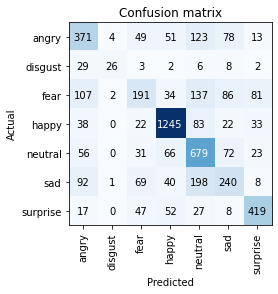

In [24]:
interp.plot_confusion_matrix()

There are quite a number of mixed up between the sad, neutral and fear which is understandable as facial expressions between them can be quite similar. Manual shifting of labels of the images may be required to get a better score.

## Export <a name = 'export'></a>
The model will be exported to the positive folder as a pickle to be used in the python code.

In [29]:
learn.export(os.path.abspath('../01_materials/exported_model/positive_images/export.pkl'))